# Decision Tree Using Regressior Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.shape

(20640, 9)

In [6]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
12727,4.4643,35.0,5.710059,0.970414,805.0,2.381657,38.60,-121.36,1.330
1278,3.6910,30.0,4.975610,1.000000,989.0,3.445993,37.86,-121.61,1.544
4584,1.4940,45.0,1.768025,1.106583,1172.0,3.673981,34.06,-118.27,1.875
3089,1.5667,15.0,6.378495,1.438710,1007.0,2.165591,35.64,-118.33,0.725
1595,6.8686,35.0,6.666667,1.053030,352.0,2.666667,37.89,-122.09,4.065


In [7]:
df = df.sample(frac = 0.20)  # model created by only 20 percent of the data

# to visualize the tree , selecting only 20 percent of the data feel free to comment this line 
# to execute the train the model

In [8]:
df.shape

(4128, 9)

In [9]:
# seperate independent variable (x) and dependent variable(y)

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18943,3.6760,12.0,4.790323,0.986352,2129.0,2.641439,38.28,-122.04
6883,2.6290,38.0,3.905683,1.015719,3485.0,4.214027,34.06,-118.09
17821,3.5745,14.0,4.571429,1.066869,3258.0,2.475684,37.37,-121.88
1585,9.5271,16.0,8.459251,1.041850,2777.0,3.058370,37.84,-122.00
10633,6.3298,16.0,5.618492,0.985637,3785.0,3.397666,33.70,-117.79
...,...,...,...,...,...,...,...,...
15330,1.6402,24.0,4.534271,1.061511,982.0,1.725835,33.23,-117.32
4029,3.0943,17.0,3.957213,1.093801,4100.0,2.249040,34.18,-118.54
14692,3.3849,16.0,3.570042,1.069348,1129.0,1.565881,32.79,-117.11
10514,4.5380,3.0,5.765442,1.129007,3214.0,2.512901,33.52,-117.69


In [11]:
y

18943    1.35000
6883     1.71600
17821    3.33700
1585     5.00001
10633    2.47100
          ...   
15330    1.69300
4029     1.74500
14692    0.96900
10514    2.78200
6501     1.38800
Name: Price, Length: 4128, dtype: float64

In [12]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [13]:
x_train.shape, x_test.shape

((3302, 8), (826, 8))

In [14]:
y_train.shape, y_test.shape

((3302,), (826,))

In [15]:
# model creation

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [16]:
model.fit(x_train, y_train)   # train the model

DecisionTreeRegressor()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([1.369  , 3.267  , 5.00001, 1.589  , 2.226  , 2.738  , 2.854  ,
       2.537  , 2.895  , 1.369  , 3.176  , 3.591  , 4.504  , 1.534  ,
       1.273  , 0.781  , 2.009  , 1.569  , 0.66   , 1.763  , 2.194  ,
       2.331  , 2.593  , 2.25   , 0.709  , 2.541  , 0.943  , 1.573  ,
       0.922  , 1.035  , 3.937  , 1.17   , 1.873  , 2.25   , 2.269  ,
       1.78   , 5.00001, 2.508  , 3.244  , 1.898  , 0.875  , 1.079  ,
       0.884  , 2.365  , 0.466  , 3.181  , 5.00001, 0.813  , 1.438  ,
       2.796  , 3.408  , 2.414  , 3.088  , 1.734  , 0.566  , 0.786  ,
       4.955  , 0.656  , 2.077  , 5.00001, 1.596  , 1.25   , 1.404  ,
       2.29   , 1.455  , 0.883  , 2.625  , 1.496  , 3.439  , 1.375  ,
       3.393  , 2.656  , 1.921  , 0.632  , 5.00001, 3.351  , 2.221  ,
       2.762  , 1.875  , 1.532  , 1.129  , 0.934  , 2.409  , 1.937  ,
       0.962  , 0.928  , 5.00001, 1.532  , 5.00001, 2.868  , 1.224  ,
       2.094  , 2.719  , 0.905  , 0.882  , 4.5    , 2.179  , 4.5    ,
       2.762  , 1.62

In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.4600630317404565

# Hyperparametr tunning

In [23]:
params = {
    'criterion' : ['squared_erro', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,10],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [24]:
regressor = DecisionTreeRegressor()

In [25]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(regressor, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', verbose = 3)


In [26]:
model.fit(x_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_erro, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criter

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_erro', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [30]:
final_model = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features = 'log2', splitter = 'best')

In [31]:
final_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='log2')

[Text(0.5736694976390346, 0.9545454545454546, 'x[6] <= 37.945\nfriedman_mse = 1.318\nsamples = 3302\nvalue = 2.069'),
 Text(0.3129918677859391, 0.8636363636363636, 'x[5] <= 2.84\nfriedman_mse = 1.376\nsamples = 2704\nvalue = 2.221'),
 Text(0.4433306827124869, 0.9090909090909092, 'True  '),
 Text(0.15874213011542498, 0.7727272727272727, 'x[1] <= 26.5\nfriedman_mse = 1.533\nsamples = 1276\nvalue = 2.608'),
 Text(0.08578174186778594, 0.6818181818181818, 'x[2] <= 6.016\nfriedman_mse = 1.349\nsamples = 500\nvalue = 2.292'),
 Text(0.0473504721930745, 0.5909090909090909, 'x[2] <= 4.361\nfriedman_mse = 1.094\nsamples = 363\nvalue = 2.086'),
 Text(0.022691500524658972, 0.5, 'x[7] <= -118.31\nfriedman_mse = 1.279\nsamples = 120\nvalue = 2.293'),
 Text(0.012329485834207765, 0.4090909090909091, 'x[7] <= -118.475\nfriedman_mse = 1.321\nsamples = 71\nvalue = 2.705'),
 Text(0.00472193074501574, 0.3181818181818182, 'x[0] <= 0.907\nfriedman_mse = 1.2\nsamples = 40\nvalue = 2.378'),
 Text(0.002098635886

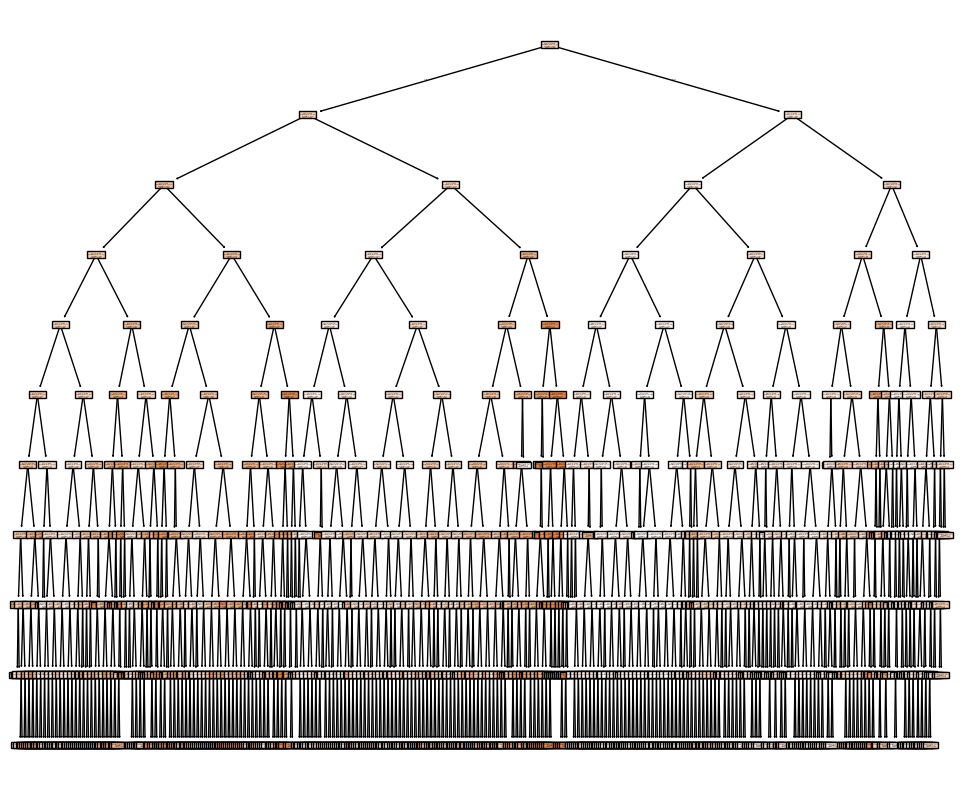

In [32]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(final_model, filled = True)

In [33]:
y_pred = model.predict(x_test)

In [34]:
r2_score(y_pred, y_test)

0.49121611393448616